In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import least_squares
import pandas as pd

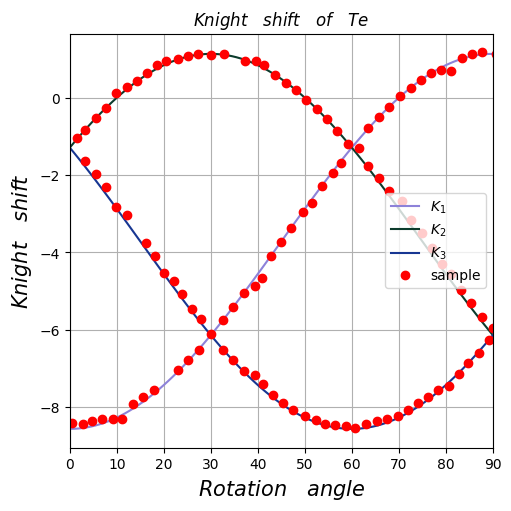

In [79]:
# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)
axes.set_xlim([0, 90])
axes.set_xticks(np.linspace(0, 90, 10))
axes.grid()

x = np.linspace(0, 90, 100)

theta = np.radians(x)

n = np.array([0, 0, 1])
s = np.array([1, 0, 0])

# ロドリゲスの回転公式
def rodrigues_rotation(axis, vec, theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return (vec[:, np.newaxis] * cos_theta + 
            np.cross(axis[:, np.newaxis], vec[:, np.newaxis] * sin_theta, axis=0) + 
            axis[:, np.newaxis] * np.dot(axis, vec) * (1 - cos_theta))

h = rodrigues_rotation(n, s, theta)

kx = 0
ky = 0
kz = 1
l = 3
t = 120

# 回転行列
def rotation_matrix(kx, ky, kz, t, l):
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(l):
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

R = rotation_matrix(kx, ky, kz, t, l)

# ナイトシフトの磁場角度依存性
def calculate_knight_shift(R, h, K):
    K_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R, np.dot(K, np.dot(np.linalg.inv(R), h_vec))))
        K_rot_values.append(K_rot)
    return K_rot_values

colors = np.random.rand(l, l)

# プロット
for i in range(l):
    K = np.array([[-8.572, 0, 0], [0, 1.146, 8.830], [0, 8.830, 0]])
    K_rot_values= calculate_knight_shift(R[i], h, K)
    
    axes.plot(x, K_rot_values, color=colors[i], label=f'$K_{i+1}$')

# CSVファイルの読み込み
csv_file_path = 'xy.csv'
data = pd.read_csv(csv_file_path)

# xとyのデータを抽出
x_data = data.iloc[:, 0].values  # CSVファイルの1列目をxとして使用
y_data = data.iloc[:, 1].values  # CSVファイルの2列目をyとして使用

plt.plot(x_data, y_data, 'ro', ls='', label='sample')

axes.legend()
plt.autoscale(enable=True, axis='y')
plt.show()

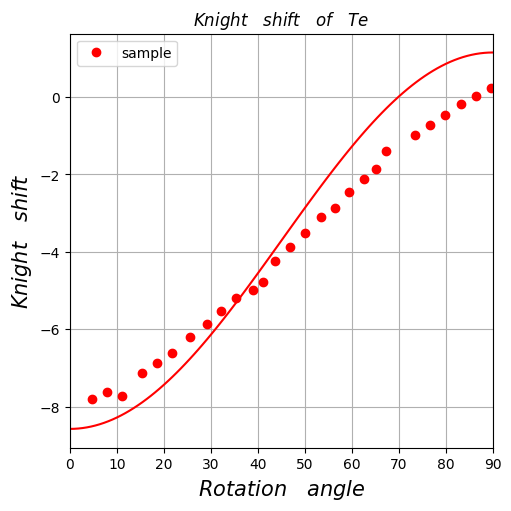

In [80]:
# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)
axes.set_xlim([0, 90])
axes.set_xticks(np.linspace(0, 90, 10))
axes.grid()

x = np.linspace(0, 90, 100)

theta = np.radians(x)

n = np.array([0, 0, 1])
s = np.array([1, 0, 0])

# ロドリゲスの回転公式
def rodrigues_rotation(axis, vec, theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return (vec[:, np.newaxis] * cos_theta + 
            np.cross(axis[:, np.newaxis], vec[:, np.newaxis] * sin_theta, axis=0) + 
            axis[:, np.newaxis] * np.dot(axis, vec) * (1 - cos_theta))

h = rodrigues_rotation(n, s, theta)

kx = 0
ky = 0
kz = 1
l = 3
t = 120

# 回転行列
def rotation_matrix(kx, ky, kz, t, l):
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(l):
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

R = rotation_matrix(kx, ky, kz, t, l)

# ナイトシフトの磁場角度依存性
def calculate_knight_shift(R, h, K):
    K_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R, np.dot(K, np.dot(np.linalg.inv(R), h_vec))))
        K_rot_values.append(K_rot)
    return K_rot_values

# プロット
K = np.array([[-8.572, 0, 0], [0, 1.146, 8.830], [0, 8.830, 0]])
K_rot_values= calculate_knight_shift(R[0], h, K)
    
axes.plot(x, K_rot_values, color='red')

# CSVファイルの読み込み
csv_file_path = 'xy(1).csv'
data = pd.read_csv(csv_file_path)

# xとyのデータを抽出
x_data = data.iloc[:, 0].values  # CSVファイルの1列目をxとして使用
y_data = data.iloc[:, 1].values  # CSVファイルの2列目をyとして使用

plt.plot(x_data, y_data, 'ro', ls='', label='sample')

axes.legend()
plt.autoscale(enable=True, axis='y')
plt.show()

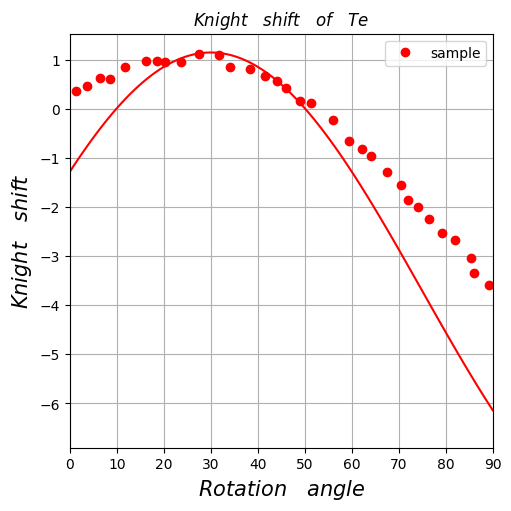

In [81]:
# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)
axes.set_xlim([0, 90])
axes.set_xticks(np.linspace(0, 90, 10))
axes.grid()

x = np.linspace(0, 90, 100)

theta = np.radians(x)

n = np.array([0, 0, 1])
s = np.array([1, 0, 0])

# ロドリゲスの回転公式
def rodrigues_rotation(axis, vec, theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return (vec[:, np.newaxis] * cos_theta + 
            np.cross(axis[:, np.newaxis], vec[:, np.newaxis] * sin_theta, axis=0) + 
            axis[:, np.newaxis] * np.dot(axis, vec) * (1 - cos_theta))

h = rodrigues_rotation(n, s, theta)

kx = 0
ky = 0
kz = 1
l = 3
t = 120

# 回転行列
def rotation_matrix(kx, ky, kz, t, l):
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(l):
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

R = rotation_matrix(kx, ky, kz, t, l)

# ナイトシフトの磁場角度依存性
def calculate_knight_shift(R, h, K):
    K_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R, np.dot(K, np.dot(np.linalg.inv(R), h_vec))))
        K_rot_values.append(K_rot)
    return K_rot_values


# プロット
K = np.array([[-8.572, 0, 0], [0, 1.146, 8.830], [0, 8.830, 0]])
K_rot_values= calculate_knight_shift(R[1], h, K)
    
axes.plot(x, K_rot_values, color='red')

# CSVファイルの読み込み
csv_file_path = 'xy(2).csv'
data = pd.read_csv(csv_file_path)

# xとyのデータを抽出
x_data = data.iloc[:, 0].values  # CSVファイルの1列目をxとして使用
y_data = data.iloc[:, 1].values  # CSVファイルの2列目をyとして使用

plt.plot(x_data, y_data, 'ro', ls='', label='sample')

axes.legend()
plt.autoscale(enable=True, axis='y')
plt.show()

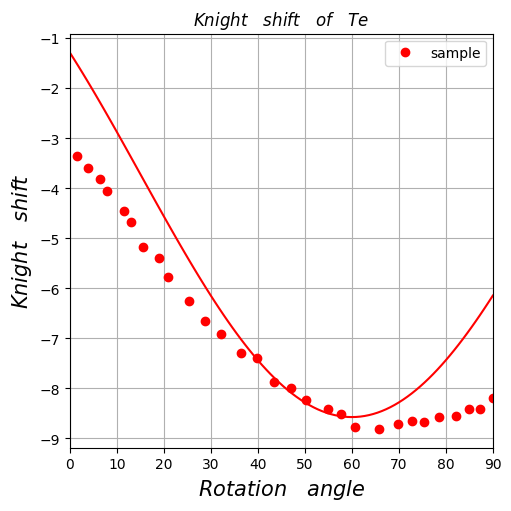

In [82]:
# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)
axes.set_xlim([0, 90])
axes.set_xticks(np.linspace(0, 90, 10))
axes.grid()

x = np.linspace(0, 90, 100)

theta = np.radians(x)

n = np.array([0, 0, 1])
s = np.array([1, 0, 0])

# ロドリゲスの回転公式
def rodrigues_rotation(axis, vec, theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return (vec[:, np.newaxis] * cos_theta + 
            np.cross(axis[:, np.newaxis], vec[:, np.newaxis] * sin_theta, axis=0) + 
            axis[:, np.newaxis] * np.dot(axis, vec) * (1 - cos_theta))

h = rodrigues_rotation(n, s, theta)

kx = 0
ky = 0
kz = 1
l = 3
t = 120

# 回転行列
def rotation_matrix(kx, ky, kz, t, l):
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(l):
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

R = rotation_matrix(kx, ky, kz, t, l)

# ナイトシフトの磁場角度依存性
def calculate_knight_shift(R, h, K):
    K_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R, np.dot(K, np.dot(np.linalg.inv(R), h_vec))))
        K_rot_values.append(K_rot)
    return K_rot_values


# プロット
K = np.array([[-8.572, 0, 0], [0, 1.146, 8.830], [0, 8.830, 0]])
K_rot_values= calculate_knight_shift(R[2], h, K)
    
axes.plot(x, K_rot_values, color='red')

# CSVファイルの読み込み
csv_file_path = 'xy(3).csv'
data = pd.read_csv(csv_file_path)

# xとyのデータを抽出
x_data = data.iloc[:, 0].values  # CSVファイルの1列目をxとして使用
y_data = data.iloc[:, 1].values  # CSVファイルの2列目をyとして使用

plt.plot(x_data, y_data, 'ro', ls='', label='sample')

axes.legend()
plt.autoscale(enable=True, axis='y')
plt.show()

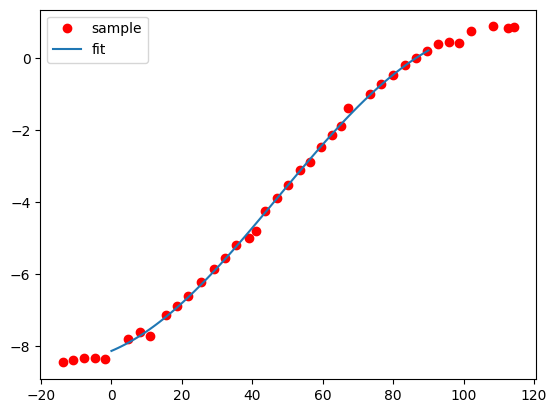

[ 2.43274456e-01  4.81025417e-01  6.53053716e-01  1.08313905e+00
  2.51663384e-01  4.26994215e-01 -8.57376769e+00  1.25316251e-01
  1.12751736e+00  8.84076176e+00 -1.21300066e-01  8.49340998e-03]


In [83]:
# CSVファイルの読み込み
csv_file_path = 'xy(1).csv'
data = pd.read_csv(csv_file_path)

# xとyのデータを抽出
x_data = data.iloc[:, 0].values  # CSVファイルの1列目をxとして使用
y_data = data.iloc[:, 1].values  # CSVファイルの2列目をyとして使用

# ロドリゲスの回転公式
def rodrigues_rotation(axis, vec, theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return (vec[:, np.newaxis] * cos_theta + 
            np.cross(axis[:, np.newaxis], vec[:, np.newaxis] * sin_theta, axis=0) + 
            axis[:, np.newaxis] * np.dot(axis, vec) * (1 - cos_theta))

# モデル関数
def model(params, x_data):
    n = np.array([params[0], params[1], params[2]])
    s = np.array([params[3], params[4], params[5]])
    XX = params[6]
    XY = params[7]
    YY = params[8]
    YZ = params[9]
    XZ = params[10]
    ZZ = params[11]
    K = np.array([[XX, XY, XZ], [XY, YY, YZ], [XZ, YZ, ZZ]])
    
    theta = np.radians(x_data)
    h_vec = rodrigues_rotation(n, s, theta)
    
    K_rot = np.zeros_like(theta)  # K_rot の初期化
    
    for j in range(len(theta)):
        h = h_vec[:, j]
        K_rot[j] = np.dot(h, np.dot(K, h))
    
    return K_rot

def residual(params, x_data, y_data):
    return model(params, x_data) - y_data

plt.plot(x_data, y_data, 'ro', ls='', label='sample')

# ユーザーからパラメータを入力させる関数
par = []
for param in ['n1', 'n2', 'n3', 's1', 's2', 's3', 'K_{xx}', 'K_{xy}', 'K_{yy}', 'K_{yz}', 'K_{xz}', 'K_{zz}']:
    value = float(input(f"Enter value for {param}: "))
    par.append(value)

res = least_squares(residual, par, args=(x_data, y_data))

x_data_fit = np.linspace(0, 90, 100)
y_data_fit = model(res.x, x_data_fit)
plt.plot(x_data_fit, y_data_fit, label='fit')
plt.legend()
plt.show()
print(res.x)